In [56]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [57]:
print(os.listdir())

['.conda', '.git', '.gitattributes', '.gitignore', '1 LEGO_Datasets.ipynb', '2 morelearning.ipynb', '3 My take- Largest Lego Set.ipynb', 'colors.csv', 'demo.py', 'downloads_schema.png', 'inventories.csv', 'inventory_parts.csv', 'inventory_sets.csv', 'LICENSE.txt', 'markdown-diff', 'parts.csv', 'part_categories.csv', 'README.md', 'sets.csv', 'themes.csv']


## Creating the Panda dataframes

In [58]:
colors = pd.read_csv("colors.csv", dtype={'name': 'str', 'rgb': 'str'})
inventories = pd.read_csv("inventories.csv")
inventory_parts = pd.read_csv("inventory_parts.csv")
inventory_sets = pd.read_csv("inventory_sets.csv")
part_categories = pd.read_csv("part_categories.csv")
parts = pd.read_csv("parts.csv")
sets = pd.read_csv("sets.csv")
themes = pd.read_csv("themes.csv")

# Ideas for this data set
* Group colors into 10 groups (124 colors out of 135 is too many)
* Track popular themes and colors by year
    ** datasets= colors, sets, themes
* Only 12 pieces had more than version 1 released.  Where those the popular colors and themes?
    ** dataset = inventories
* How has the size of sets changed over time?
* What colors are associated with which themes? 
* Could you predict which theme a set is from just by the bricks it contains?
* What sets have the most-used pieces in them? What sets have the rarest pieces in them?
* Have the colors of LEGOs included in sets changed over time?



## Creating the investigate function

In [59]:
def investigate(db):
    """explores the data"""
    
    print(f"Exploring the data in the dataframe")
    print(db.index)
    print("")
    print("COLUMN NAMES")
    print(db.columns)
    print()
    nRow, nCol = db.shape
    print(f'There are {nRow} rows and {nCol} columns')
    print()
    print("DATA TYPES")
    print(db.dtypes)
    print()
    print("NUMBER OF UNIQUE VALUES IN EACH COLUMN")
    print(db.nunique())
    print()
    print("PREVIEWING THE DATASET")
    print(db.head())
    print()
    print(db.info())
    print()
    print("NUMBER OF NON-NULL VALUES IN EACH COLUMN")
    print(db.count())


## Grouping the 135 indexed colors into 14 groups for simplified graphing

In [60]:
# Determine the number of rows in the colors index DataFrame
num_rows = colors.shape[0]
# Print the number of rows
print(f"The number of rows in the colors DataFrame is {num_rows}.")

The number of rows in the colors DataFrame is 135.


In [61]:
# Remove extraneous quotes
# Use the str.replace() method to remove the quotes, brackets, leading dashes from the name column

colors['name'] = colors['name'].str.replace(r'^["\']|["\']$', '', regex=True)
# regex=True: This argument is used to specify that the pattern is a regular expression.
# r'^["\']|["\']$': This is a regular expression pattern used to match specific characters at the beginning or end of the string.
# The ^ symbol matches the start of the string, and the $ symbol matches the end of the string.
# The pattern ["\'] matches either a single or double quote character.
# The | symbol is a logical OR operator that matches either the pattern before or after it.
# The regex pattern ^["\'] matches a single or double quote character at the beginning of the string.
# The regex pattern ["\']$ matches a single or double quote character at the end of the string.

# Remove leading dashes
# r "'-": This regular expression pattern matches a single quote followed by a dash character.
colors['name'] = colors['name'].str.replace(r"'-", '', regex=True)

colors['name'] = colors['name'].str.replace(r'[\[\]]', '', regex=True) #remove brackets
# Strip leading/trailing spaces
colors['name'] = colors['name'].str.strip()
# Replace 'f' with False and 't' with True
colors['is_trans'] = colors['is_trans'].replace({'f': False, 't': True})
# Define the mapping of color names to groups
color_groups = {
    'Red': 'Red',
    'Green': 'Green',
    'Blue': 'Blue',
    'Light Blue': 'Blue',
    'Dark Green': 'Green',
    'Medium Lavender': 'Purple',
    'Yellow': 'Yellow',
    'Orange': 'Orange',
    'Pink': 'Pink',
    'Unknown': 'Unknown\nWild Card',
    'Black': 'Black',
    'Dark Turquoise': 'Blue',
    'Medium Blue': 'Blue',
    'Tan': 'Brown',
    'Light Gray': 'Gray',
    'Dark Gray': 'Gray',
    'Brown': 'Brown',
    'White': 'White',
    'Purple': 'Purple',
    'Lime': 'Green',
    'Magenta': 'Pink',
    'Dark Pink': 'Pink',
    'Light Pink': 'Pink',
    'Bright Pink': 'Pink',
    'Lavender': 'Purple',
    'Sand Blue': 'Blue',
    'Sand Green': 'Green',
    'Sand Purple': 'Purple',
    'Sand Red': 'Red',
    'Sand Yellow': 'Yellow',
    'Dark Red': 'Red',
    'Medium Dark Pink': 'Pink',
    'Dark Brown': 'Brown',
    'Medium Azure': 'Blue',
    'Medium Blue': 'Blue',
    'Medium Green': 'Green',
    'Medium Lime': 'Green',
    'Medium Orange': 'Orange',
    'Medium Red': 'Red',
    'Medium Violet': 'Purple',
    'Medium Yellow': 'Yellow',
    'Bright Light Blue': 'Blue',
    'Bright Light Orange': 'Orange',
    'Bright Light Yellow': 'Yellow',
    'Bright Purple': 'Purple',
    'Bright Red': 'Red',
    'Bright Yellow': 'Yellow',
    'Light Aqua': 'Blue',
    'Light Green': 'Green',
    'Light Lime': 'Green',
    'Light Orange': 'Orange',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Turquoise': 'Blue',
    'Light Yellow': 'Yellow',
    'Olive Green': 'Green',
    'Very Light Bluish Gray': 'Gray',
    'Very Light Gray': 'Gray',
    'Very Light Orange': 'Orange',
    'Very Light Yellow': 'Yellow',
    'Dark Blue-Violet': 'Blue',
    'Dark Blue': 'Blue',
    'Dark Azure': 'Blue',
    'Dark Orange': 'Orange',
    'Dark Tan': 'Brown',
    'Dark Purple': 'Purple',
    'Dark Flesh': 'Brown',
    'Dark Salmon': 'Red',
    'Dark Yellow': 'Yellow',
    'Light Blue-Violet': 'Blue',
    'Light Bluish Gray': 'Gray',
    'Light Grayish Blue': 'Gray',
    'Light Grayish Orange': 'Orange',
    'Light Nougat': 'Brown',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Yellowish Orange': 'Yellow',
    'Medium Blue-Violet': 'Blue',
    'Medium Bluish Gray': 'Gray',
    'Medium Dark Flesh': 'Brown',
    'Medium Dark Pink': 'Pink',
    'Medium Lavender': 'Purple',
    'Medium Nougat': 'Brown',
    'Medium Purple': 'Purple',
    'Medium Reddish Brown': 'Brown',
    'Medium Violet': 'Purple',
    'Medium Yellowish Orange': 'Yellow',
    'Bright Bluish Green': 'Green',
    'Bright Bluish Violet': 'Blue',
    'Bright Green': 'Green',
    'Bright Orange': 'Orange',
    'Bright Purple': 'Purple',
    'Bright Reddish Violet': 'Red',
    'Bright Violet': 'Purple',
    'Bright Yellowish Green': 'Yellow',
    'Light Bluish Green': 'Green',
    'Light Bluish Violet': 'Blue',
    'Light Bright Blue': 'Blue',
    'Light Bright Green': 'Green',
    'Light Brown': 'Brown',
    'Trans-Yellow': 'Yellow',
    'Trans-Black IR Lens': 'Black',
    'Light': 'White',
    'Salmon': 'Red',
    'Light Violet': 'Purple',
    'Glow In Dark Opaque': 'White',
    'Dark Violet' : 'Purple',
    'Trans Flame Yellowish Orange': 'Orange',
    'Trans Fire Yellow': 'Yellow',
    'Trans Light Royal' : 'Blue',
    'Reddish Lilac': 'Purple',
    'No Color' : 'Black',
    'Trans-Dark': 'Black',
    'Trans-Green': 'Green',
    'Trans-Bright Green': 'Green',
    'Trans-Red': 'Red',
    'Trans-Black': 'Black',
    'Chrome Gold': 'Metallic',
    'Chrome Antique Brass': 'Metallic',
    'Chrome Black': 'Metallic',
    'Chrome Blue': 'Metallic',
    'Chrome Green': 'Metallic',
    'Chrome Pink': 'Metallic',
    'Chrome Silver': 'Metallic',
    'Fabuland Brown': 'Brown',
    'Glow in Dark White': 'White',
    'Trans-Light' : 'Clear',
    'Trans-Neon Green': 'Green',
    'Trans-Very Lt': 'Clear',
    'Trans-Dark Pink': 'Pink',
    'Trans-Clear': 'Clear',
    'Trans-Purple': 'Purple',
    'Trans-Neon Orange': 'Orange',
    'Chrome' : 'Metallic',
    'Reddish Brown': 'Brown',
    'Trans-Neon Yellow': 'Yellow',
    'Dark Bluish Gray': 'Gray',
    'Medium': 'Unknown\nWild Card',
    'Speckle Black-Copper': 'Metallic',
    'Speckle DBGray-Silver': 'Metallic',
    'Light Flesh': 'Pink',
    'Milky White': 'White',
    'Metallic Silver': 'Metallic',
    'Metallic Gold': 'Metallic',
    'Metallic Green': 'Metallic',
    'Metallic Gold' : 'Metallic',
    'Royal': 'Blue',
    'Flesh': 'Pink',
    'Violet': 'Purple',
    '-Violet': 'Purple',
    'Glitter Trans-Dark Pink': 'Pink',
    'Glitter Trans-Clear': 'Clear',
    'Aqua': 'Blue',
    'Glitter Trans-Purple': 'Purple',
    'Speckle Black-Silver': 'Metallic',
    'Speckle Black-Gold': 'Metallic',
    'Copper': 'Metallic',
    'Pearl Light Gray': 'Gray',
    'Metal': 'Metallic',
    'Pearl Light Gold': 'Metallic',
    'Trans-Medium': 'Unknown\nWild Card', 
    'Pearl Dark Gray': 'Gray',
    'Pearl Very Light Gray': 'Gray',
    'Flat Silver': 'Metallic',
    'Trans-Orange': 'Orange',
    'Pearl White': 'White',
    'Bright Light': 'White',
    'Rust': 'Brown',
    'Trans-Pink': 'Pink',
    'Sky': 'Blue',
    'Trans-Light Purple': 'Purple',
    'Dark': 'Unknown\nWild Card',
    'Glow In Dark Trans': 'Clear',
    'Pearl Gold': 'Metallic',
    'Maersk': 'Blue',
    'Earth Orange': 'Orange',
    'Sand': 'Yellow',
    'Glitter Trans-Light': 'Clear',
    'Yellowish Green': 'Green',
    'Flat Dark Gold': 'Metallic',
    'Glitter Trans-Neon Green': 'Green',
}

# Apply the mapping to create a new column 'color_group'
colors['color_group'] = colors['name'].map(color_groups)

# Check for unassigned names
unassigned_names = colors[colors['color_group'].isna()]

# Count how many have group as NaN
na_count = unassigned_names.shape[0]
print(f"Number of unassigned names : {na_count}")
print()

# Display unassigned names
if not unassigned_names.empty:
    print("Unassigned color names:")
    print(unassigned_names[['id', 'name']])
else:
    print("All color names have been assigned to a group.")

print(colors.head())

Number of unassigned names : 0

All color names have been assigned to a group.
   id            name     rgb  is_trans         color_group
0  -1         Unknown  0033B2     False  Unknown\nWild Card
1   0           Black  05131D     False               Black
2   1            Blue  0055BF     False                Blue
3   2           Green  237841     False               Green
4   3  Dark Turquoise  008F9B     False                Blue


In [62]:
# Count the number of unique names
unique_groups_count = colors['color_group'].nunique()

# Display the count of unique names
print(f"There are now {unique_groups_count} color groups")

There are now 14 color groups


## Special Color Features: Translucent, Glow-in-the-Dark, Glitter

In [63]:
# Count the number of color names containing 'glow'
# Access the name column of the colors dataframe
name_column = colors['name']
# Count the number of color names containing 'glow' using the str.contains() method  
# name_column.str.contains('glow', case=False, na=False) => returns a boolean series (column) where the color names contain 'glow'
#.shape[0] => returns the number of rows in the series that contain 'True'
glow_count = colors[name_column.str.contains('glow', case=False, na=False)].shape[0]
print()

# Display the count of color names containing 'glow'
print(f"Number of pieces that glow in the dark: {glow_count}")
print()

# Count the number of color names containing 'glitter'
glitter_count = colors[colors['name'].str.contains('glitter', case=False, na=False)].shape[0]

# Display the count of color names containing 'glitter'
print(f"Number of pieces with glitter: {glitter_count}")
print()

# Count the number of colors that have is_trans = True
trans_count = colors[colors['is_trans'] == True].shape[0]

# Display the count of colors that have is_trans = True
print(f"Number of pieces that are translucent: {trans_count}")


Number of pieces that glow in the dark: 3

Number of pieces with glitter: 5

Number of pieces that are translucent: 28


## Merge the data frames inventory_parts, inventories and sets so that colors can be tracked by year

In [65]:
# Merge inventory_parts with colors to get the color names
inventory_parts_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id')

# Merge inventory_parts_colors with inventories to get the set_num
inventory_parts_colors = inventory_parts_colors.merge(inventories, left_on='inventory_id', right_on='id')

# Merge the resulting DataFrame with sets to get the set details
merged_df = inventory_parts_colors.merge(sets, left_on='set_num', right_on='set_num')

# Inspect the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())
print()
print("Merged DataFrame Columns:")
print(merged_df.columns)

Merged DataFrame:
   inventory_id  part_num  color_id  quantity is_spare  id_x  \
0             1  48379c01        72         1        f    72   
1             1     48395         7         1        f     7   
2             1  mcsport6        25         1        f    25   
3             1    paddle         0         1        f     0   
4            22     15573        72         1        f    72   

             name_x     rgb  is_trans color_group  id_y  version  set_num  \
0  Dark Bluish Gray  6C6E68     False        Gray     1        1   7922-1   
1        Light Gray  9BA19D     False        Gray     1        1   7922-1   
2            Orange  FE8A18     False      Orange     1        1   7922-1   
3             Black  05131D     False       Black     1        1   7922-1   
4  Dark Bluish Gray  6C6E68     False        Gray    22        1  30277-1   

                                              name_y  year theme_id  num_parts  
0  McDonald's Sports Set Number 6 - Orange Vest S... 

### Determining the range of years in the merged data frame

In [73]:
# Determine the range of years in the merged_df DataFrame
min_year = merged_df['year'].min()
max_year = merged_df['year'].max()

# Print the range of years
print(f"The data in the merged_df DataFrame is from {min_year} to {max_year}.")

The data in the merged_df DataFrame is from 1950 to 2017.


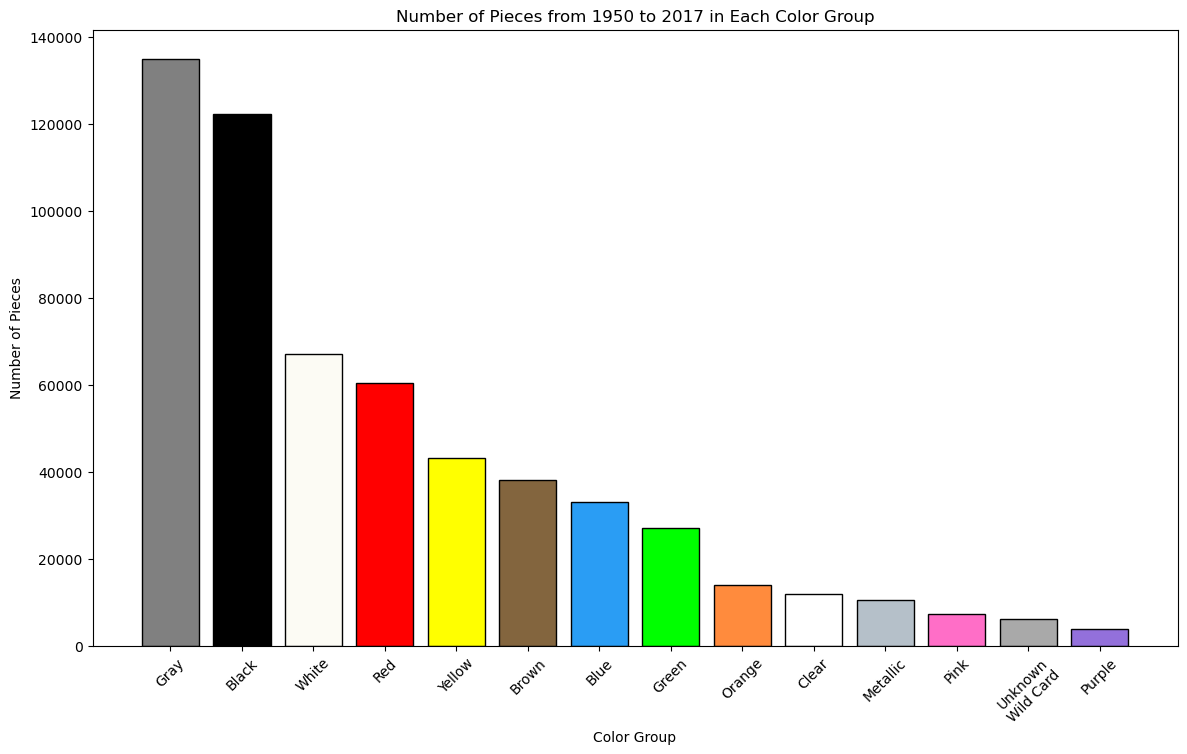

In [74]:
# Group the data by color group and sum the number of pieces
color_group_counts = merged_df['color_group'].value_counts()

# Define the color mapping for the bar colors
color_mapping = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFFF00',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#83653E',
    'Gray': '#808080',
    'White': '#FCFBF4',
    'Clear': '#FFFFFF',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9'
}

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(color_group_counts.index, color_group_counts.values, color=[color_mapping.get(color_group, '#A9A9A9') for color_group in color_group_counts.index], edgecolor='black')

# Add labels and title
plt.xlabel('Color Group')
plt.ylabel('Number of Pieces')
plt.title('Number of Pieces from 1950 to 2017 in Each Color Group')
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

## Changes in Color Groups from 1950 to 2017

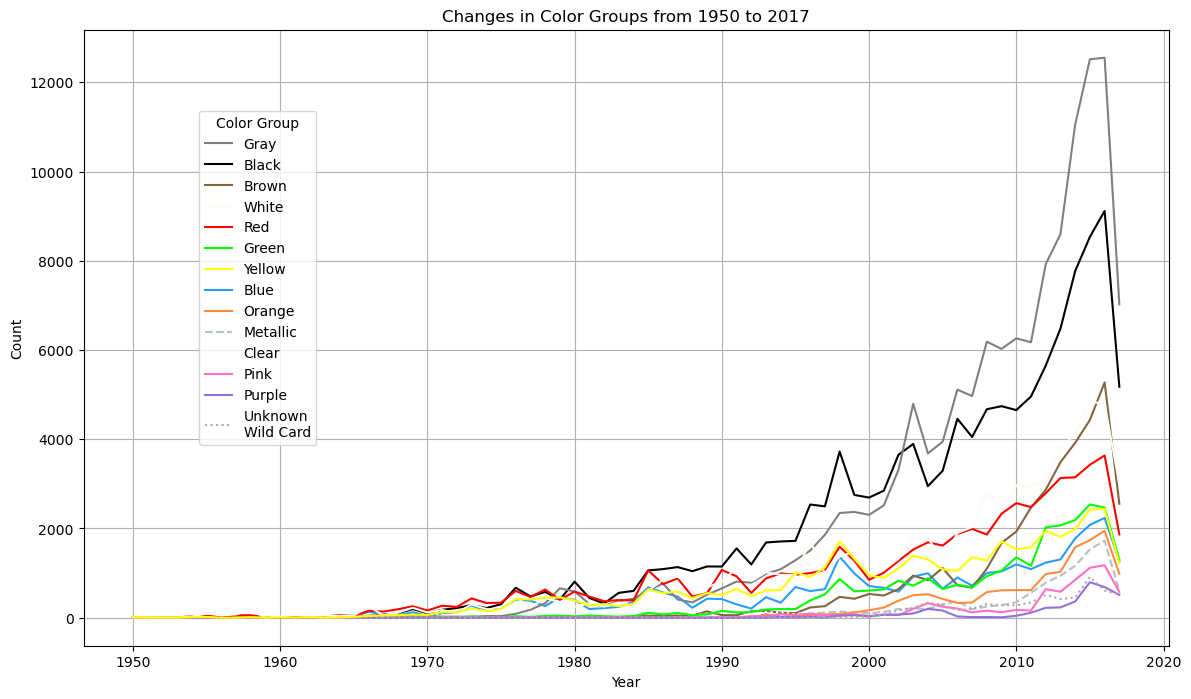

In [80]:
# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Define the desired order of color groups in the legend
legend_order = ['Gray', 'Black', 'Brown', 'White', 'Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Metallic', 'Clear', 'Pink', 'Purple', 'Unknown\nWild Card']

# Initialize the lines dictionary
lines = {}

# Plot the data
plt.figure(figsize=(14, 8))
for color_group in color_group_counts.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping.get(color_group, '#A9A9A9'), linestyle='--')
    elif color_group in ['Unknown\nWild Card', 'Clear']:
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping.get(color_group, '#A9A9A9'), linestyle=':')
    else:
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping.get(color_group, '#A9A9A9'))
    lines[color_group] = line

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]
plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1950 to 2017')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

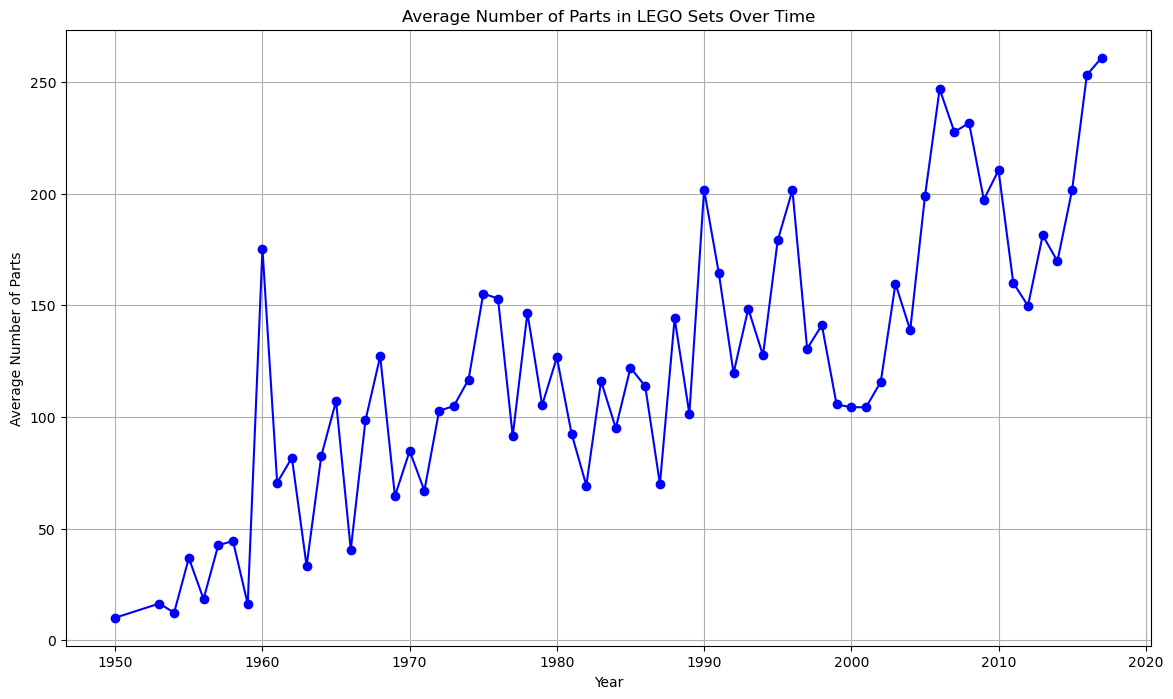

In [67]:
# Define the color mapping for the bar colors
color_mapping = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFFF00',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#83653E',
    'Gray': '#808080',
    'White': '#F0E3CE',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9'
}

# Group the data by year and calculate the average number of parts per set
average_num_parts_per_year = sets.groupby('year')['num_parts'].mean()

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(average_num_parts_per_year.index, average_num_parts_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Parts in LEGO Sets Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()

In [ ]:
# Merge the merged_df with the themes DataFrame again to get additional theme information if needed
# For example, if you want to get the parent theme information
merged_df = merged_df.merge(themes, left_on='theme_id', right_on='id', suffixes=('', '_parent'))

# Group the data by year and theme name, and count the occurrences
theme_counts_per_year = merged_df.groupby(['year', 'name']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
for theme in theme_counts_per_year.columns:
    plt.plot(theme_counts_per_year.index, theme_counts_per_year[theme], label=theme)


In [ ]:
# Group the data by year and parent_id, and count the occurrences
parent_id_counts_per_year = merged_df.groupby(['year', 'parent_id']).size().unstack(fill_value=0)

# Filter the data to include only the years from 1965 onwards
parent_id_counts_per_year = parent_id_counts_per_year[parent_id_counts_per_year.index >= 1965]

# Identify the top 10 parent_ids based on the total count
top_10_parent_ids = parent_id_counts_per_year.sum().nlargest(10).index
print(top_10_parent_ids)

# Filter the data to include only the top 10 parent_ids
top_10_parent_id_counts_per_year = parent_id_counts_per_year[top_10_parent_ids]

#158.0, 52.0, 67.0, 126.0, 482.0, 5.0, 22.0, 465.0, 112.0, 50.0
# Define a mapping of parent_id to descriptive names
parent_id_to_name = {
    158: 'Licensed Themes',
    52: 'Star Wars',
    67: 'Classic Town',
    126: 'Space',
    482: 'Technic',
    5: 'Model',
    22: 'Creator',
    465: 'Classic Basic',
    112: 'Castle',
    50: 'Trains',

}

# Replace the parent_ids with their descriptive names
top_10_parent_id_counts_per_year.columns = top_10_parent_id_counts_per_year.columns.map(parent_id_to_name)

# Plot the data
plt.figure(figsize=(14, 8))
for parent_name in top_10_parent_id_counts_per_year.columns:
    if parent_name == 'Classic Basic':
        plt.plot(top_10_parent_id_counts_per_year.index, top_10_parent_id_counts_per_year[parent_name], label=parent_name, color='black', linewidth=2.5)
    else:
        plt.plot(top_10_parent_id_counts_per_year.index, top_10_parent_id_counts_per_year[parent_name], label=parent_name)

plt.title('Top 10 Parent IDs by Year (Starting from 1965)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Parent Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()